In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier

In [218]:
data = pd.read_csv('data.csv')

In [219]:
# Data processing
data = data.iloc[:, 1:] # removes first column with id's
X_raw = data.iloc[:,:-1] # creates feature matrix without churn
#X_raw = X_raw.drop(['PhoneService','MultipleLines', 'OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'], axis = 1)

In [220]:
encoder = OneHotEncoder(sparse = False)
column_trans = make_column_transformer((encoder, ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']), remainder = 'passthrough')
#encoder.fit_transform(X_raw[['PaymentMethod']])
#encoder.categories_
# NEW feature matrix
X = column_trans.fit_transform(X_raw)

In [221]:
# Binary encode churn
target = data.iloc[:,-1:]
y = target.apply(LabelEncoder().fit_transform)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [223]:
# Hyperprameter tuning
#params = {'n_estimators' :[180, 200, 215, 230],
#         'max_depth': [8],
#         'min_samples_leaf': [18]}

#params = {'n_estimators' :[190,200,230],
 #        'max_depth': [7,8,9],
 #       'min_samples_split': [15,20,25]}

#random_grid = {
 #'max_depth': [6,8,10],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [40, 50, 60],

 #'n_estimators': [ 300, 350,400]}
#gridsearch = GridSearchCV(RandomForestClassifier(max_features = 'sqrt', random_state=5, oob_score=True), params,verbose=1, cv=5, n_jobs=-1, scoring = 'roc_auc')
#gridsearch = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=5, oob_score=True), param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'roc_auc')

gridsearch = RandomForestClassifier(random_state=5, oob_score=True, n_estimators=215, min_samples_leaf=18,max_depth=8,max_features='sqrt')

In [224]:
clf = gridsearch.fit(X_train,y_train)

In [225]:
#clf.best_params_

In [226]:
# Check overfitting by predicting the training set. Single iteration.
predict_train = clf.predict(X_train) # predict for training set
acc = accuracy_score(y_train, predict_train)
pre = precision_score(y_train, predict_train)
rec = recall_score(y_train, predict_train)
print('TRAIN SET SINGLE prediction scores:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TRAIN SET SINGLE prediction scores:
Accuracy score = 0.8691588785046729
Precision score = 0.7878260869565218
Recall score = 0.6937212863705973


In [227]:
# Scores for single iteration of test data
predict = clf.predict(X_test) 
acc = accuracy_score(y_test, predict)
pre = precision_score(y_test, predict)
rec = recall_score(y_test, predict)
print('TEST SET SINGLE:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TEST SET SINGLE:
Accuracy score = 0.861611374407583
Precision score = 0.772635814889336
Recall score = 0.6820603907637656


In [228]:
#a = clf.best_estimator_
y_predict = cross_val_predict(clf, X_test,y_test, cv =10)
acc = accuracy_score(y_test, y_predict)
pre = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
print('TEST SET 10 FOLD CV (hold out data set)\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TEST SET 10 FOLD CV (hold out data set)
Accuracy score = 0.8611374407582938
Precision score = 0.7960526315789473
Recall score = 0.6447602131438721


In [229]:
#cross_val_score(a, X_test, y_test, cv = 5, scoring = 'recall')

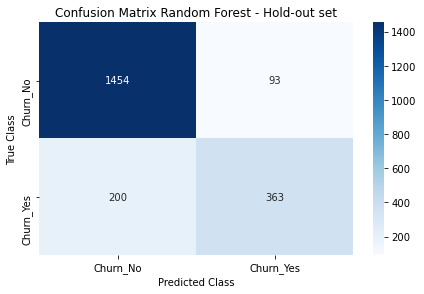

In [230]:
matrix = confusion_matrix(y_test, y_predict)
# Plot confusion Matrix
class_names = ['Churn_No', 'Churn_Yes']
dataframe_Confusion =  pd.DataFrame(matrix, index=class_names, columns=class_names) 

sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix Random Forest - Hold-out set")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()